###I. Simple Linear Regression

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df2= pd.read_csv("/content/sample_data/Salary_Data.csv")
display(df2.head())

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
x=df2.iloc[:,:-1]
y=df2.iloc[:,-1]
display(type(x))
display(type(y))

pandas.core.frame.DataFrame

pandas.core.series.Series

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.33, random_state=1)


In [ ]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train, y_train)
y_pred= regressor.predict(x_test)
display(y_pred)
display(y_test)

array([ 74675.38,  91160.03,  61853.98,  81086.08,  67348.87,  88412.59,
       113139.56,  44453.52, 105813.05,  98486.54])

17     83088.0
21     98273.0
10     63218.0
19     93940.0
14     61111.0
20     91738.0
26    116969.0
3      43525.0
24    109431.0
22    101302.0
Name: Salary, dtype: float64

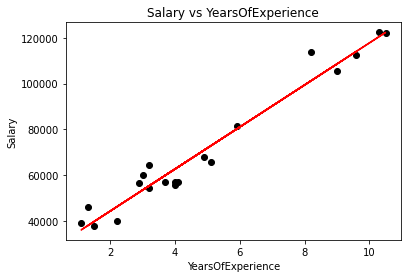

In [ ]:
# visualizing training data
plt.scatter(x_train,y_train, color="black")
plt.plot(x_train,regressor.predict(x_train), color="red")
plt.title("Salary vs YearsOfExperience")
plt.xlabel("YearsOfExperience")
plt.ylabel("Salary")
plt.show()

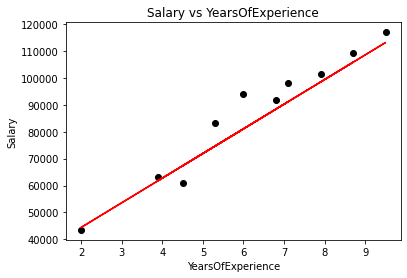

In [ ]:
# visualizing test data
plt.scatter(x_test,y_test, color="black")
plt.plot(x_test,regressor.predict(x_test), color="red")
plt.title("Salary vs YearsOfExperience")
plt.xlabel("YearsOfExperience")
plt.ylabel("Salary")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


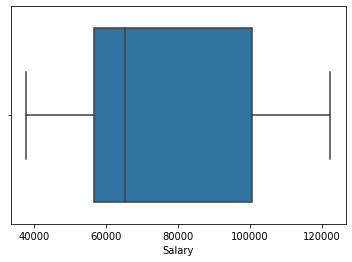

In [ ]:
import seaborn as sns
sns.boxplot(y)
# lines_representation: q1,q2,median,q3,q4... no outliers

###II. Multiple Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML course/50_Startups.csv")
display(df.head())

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
x= df.iloc[:,:-1].values
y= df.iloc[:, -1].values
print(type(x))

<class 'numpy.ndarray'>


In [ ]:
# one hot encoding for categorical column
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct= ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])], remainder='passthrough')
# convert to dataFrame as we have more than 1 columns in x
x= ct.fit_transform(pd.DataFrame(x))
print(x[:5])

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred= regressor.predict(x_test)
print(type(y_pred))
print(y_pred)
print(type(y_test))

<class 'numpy.ndarray'>
[114664.41715867  90593.15531621  75692.84151575  70221.88679652
 179790.25514872 171576.9201852   49753.5875203  102276.65888936
  58649.37795761  98272.02561131]
<class 'numpy.ndarray'>


In [ ]:
new_df=pd.DataFrame([y_test,y_pred]).transpose()
new_df

,0,1
0,105008.31,114664.417159
1,96479.51,90593.155316
2,78239.91,75692.841516
3,81229.06,70221.886797
4,191050.39,179790.255149
5,182901.99,171576.920185
6,35673.41,49753.587520
7,101004.64,102276.658889
8,49490.75,58649.377958
9,97483.56,98272.025611


In [ ]:
# backward elimination
import statsmodels.api as sm
x = np.append(arr = np.ones((50, 1)).astype(int), values = x, axis = 1)
X_opt = x[:, [0, 2, 3, 4, 5]]
X_opt = np.array(X_opt,dtype=float)
# endog is array-like
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     205.0
Date:                Sat, 03 Apr 2021   Prob (F-statistic):           2.90e-28
Time:                        05:03:58   Log-Likelihood:                -526.75
No. Observations:                  50   AIC:                             1064.
Df Residuals:                      45   BIC:                             1073.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        5.46e+04   6371.060      8.571      0.000    4.18e+04    6.74e+04
x1          1091.1075   3377.087      0.323      0.748   -5710.695    7892.910
x2           -39.3434   3309.047     -0.012      0.991   -6704.106    6625.420
x3             0.8609      0.031     27.665      0.000       0.798       0.924
x4            -0.0527      0.050     -1.045      0.301      -0.154       0.049
==============================================================================
Omnibus:                       14.275   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.260
Skew:                          -0.953   Prob(JB):                     6.57e-05
Kurtosis:                       5.369   Cond. No.                     7.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_opt = x[:, [0, 2, 4, 5]]
X_opt = np.array(X_opt,dtype=float)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     279.4
Date:                Sat, 03 Apr 2021   Prob (F-statistic):           1.59e-29
Time:                        05:04:01   Log-Likelihood:                -526.75
No. Observations:                  50   AIC:                             1062.
Df Residuals:                      46   BIC:                             1069.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.459e+04   6121.987      8.917      0.000    4.23e+04    6.69e+04
x1          1111.1761   2893.049      0.384      0.703   -4712.230    6934.582
x2             0.8609      0.031     28.127      0.000       0.799       0.922
x3            -0.0527      0.050     -1.057      0.296      -0.153       0.048
==============================================================================
Omnibus:                       14.252   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.188
Skew:                          -0.953   Prob(JB):                     6.81e-05
Kurtosis:                       5.362   Cond. No.                     6.72e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_opt = x[:, [0, 4, 5]]
X_opt = np.array(X_opt,dtype=float)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Sat, 03 Apr 2021   Prob (F-statistic):           7.29e-31
Time:                        05:04:26   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
x1             0.8621      0.030     28.589      0.000       0.801       0.923
x2            -0.0530      0.049     -1.073      0.289      -0.152       0.046
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_opt = x[:, [0, 4]]
X_opt = np.array(X_opt,dtype=float)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sat, 03 Apr 2021   Prob (F-statistic):           3.50e-32
Time:                        05:04:51   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###III. Polynomial Regression

1. polynomial linear regression is called so as :

 y= b0+b1*x+b2*(x**2)+......

 **linear** because coefficients are linear.

2. no need to split data to train and test as dataset is very small and we donot have much amount of information available. therefore, all dataset is considered as training set.

In [ ]:
df=pd.read_csv('/content/sample_data/Position_Salaries.csv')
display(df)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
x=df.iloc[:,1:2].values
y=df.iloc[:,2:].values
print(x[:5])

[[1]
 [2]
 [3]
 [4]
 [5]]


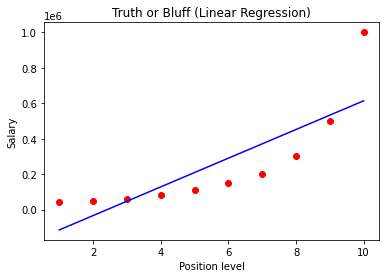

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg.fit(x,y)
plt.scatter(x,y, color="red")
plt.plot(x,lin_reg.predict(x), color="blue")
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


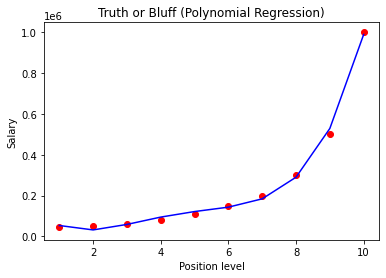

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pol_reg= PolynomialFeatures(degree=4)
x_poly=pol_reg.fit_transform(x)
# display(x_poly)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y)
plt.scatter(x,y, color="red")
plt.plot(x,lin_reg_2.predict(x_poly), color="blue")
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

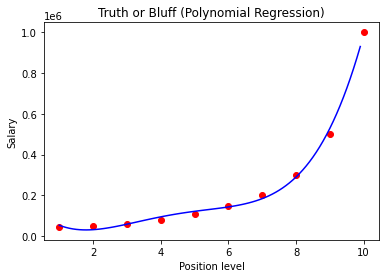

In [ ]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
xGrid= np.arange(min(x),max(x),0.1)
xGrid=xGrid.reshape(len(xGrid),1)
plt.scatter(x,y, color="red")
plt.plot(xGrid,lin_reg_2.predict(pol_reg.fit_transform(xGrid)), color="blue")
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

###IV. Support Vector Regression

In [ ]:
df=pd.read_csv('/content/sample_data/Position_Salaries.csv')
display(df)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


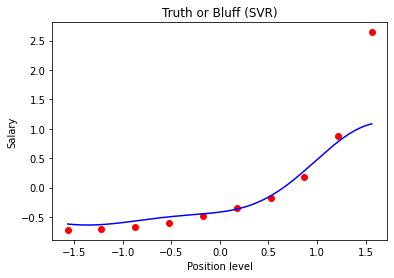

Original salary at position level 6.5 : 160000
Predicted salary at position level 6.5 :  [170370.0204065]


In [ ]:
x=df.iloc[:,1:2].values
y=df.iloc[:,2:].values

# scale the data for svr, not done by regressor in this case
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
x= sc_x.fit_transform(x)
y= sc_y.fit_transform(y)

from sklearn.svm import SVR
regressor= SVR()
regressor.fit(x,y)

# predict salary
scaled_pred=regressor.predict(sc_x.transform([[6.5]]))
# get original from scaled prediction
y_pred=sc_y.inverse_transform(scaled_pred)

# visualising
x_grid= np.arange(min(x), max(x), 0.01)
x_grid= x_grid.reshape(len(x_grid),1)
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, regressor.predict(x_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
print("Original salary at position level 6.5 : 160000" )
print("Predicted salary at position level 6.5 : ",y_pred)

###V. Decision Tree Regression

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML course/Position_Salaries.csv')
display(df)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


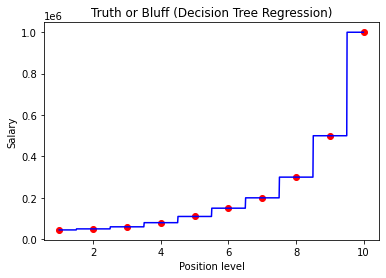

[150000.]


In [ ]:
x=df.iloc[:,1:2].values
y=df.iloc[:,2:].values

# Training the Decision Tree Regression model on the whole dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x, y)

# Predicting a new result
y_pred=regressor.predict([[6.5]])

# Visualising the Decision Tree Regression results (higher resolution)
X_grid = np.arange(min(x), max(x), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
print(y_pred)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###VI. Random Forest Regression

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


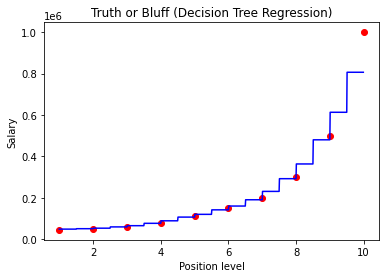

Original salary at position level 6.5 : 160000
Predicted salary at position level 6.5 :  [160333.33333333]


In [ ]:
x=df.iloc[:,1:2].values
y=df.iloc[:,2:].values

# Training the Decision Tree Regression model on the whole dataset
from sklearn.ensemble import RandomForestRegressor
regressor= RandomForestRegressor(n_estimators=300, random_state=0)
regressor.fit(x, y)

# Predicting a new result
y_pred=regressor.predict([[6.5]])

# Visualising the Decision Tree Regression results (higher resolution)
X_grid = np.arange(min(x), max(x), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
print("Original salary at position level 6.5 : 160000" )
print("Predicted salary at position level 6.5 : ",y_pred)

 1. evaluation parameters for regression model:

 - R Square/Adjusted R Square

 - Mean Square Error(MSE)/Root Mean Square Error(RMSE) 

 - Mean Absolute Error(MAE)